In [63]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import statsmodels.api as sm

from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn import feature_selection

In [27]:
all = pd.read_csv("GA - Data set - Cell phone.csv")
all.shape

(3333, 11)

In [28]:
all.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [29]:
all.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [30]:
fFields = ['Churn', 'ContractRenewal', 'DataPlan']
nFields = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 
           'OverageFee','RoamMins']
all.Churn = all.Churn.astype('category')
# for i in fFields:
#    all[i] = all[i].astype('category')
# Dummies - https://chrisalbon.com/python/pandas_convert_categorical_to_dummies.html

In [31]:
# DataUsage & Monthly Charge are correlated
all.corr()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
AccountWeeks,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023
RoamMins,0.009514,-0.045871,-0.001318,0.162746,-0.009640,-0.010155,0.021565,0.117433,-0.011023,1.000000


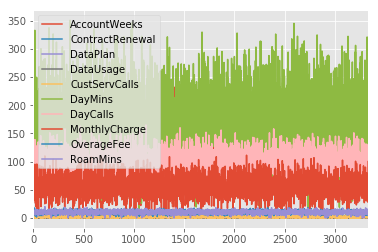

In [32]:
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
plt.style.use('ggplot')
all.plot()
plt.show()

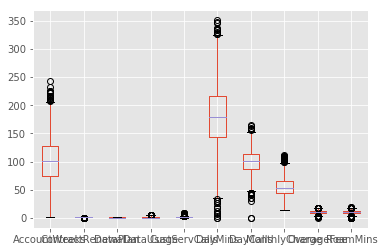

In [33]:
all.boxplot()
plt.show()

In [34]:
allGByChurn = all.groupby('Churn')
allGByChurn.agg({'ContractRenewal': 'count', 'AccountWeeks' : 'sum'})

,ContractRenewal,AccountWeeks
Churn,,
0,2850,287262
1,483,49587


In [35]:
churnRate = sum(all.Churn == 1)/len(all) 
churnRate

0.14491449144914492

In [36]:
y = all.Churn
x = all
x = x.drop('Churn', axis=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.30, random_state=42)

In [61]:
logIt = linear_model.LogisticRegression()
logIt.fit(x_train, y_train)
print(x_train.columns)
print(np.float128(logIt.coef_))

Index(['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')
[[-0.00057801179 -2.1100621 -0.92934216  0.11112751  0.46421671
   0.011668708 -0.0042902746 -0.0089933788  0.11417632  0.070555274]]


In [62]:
np.exp(logIt.coef_)

array([[ 0.99942216,  0.12123044,  0.39481335,  1.1175374 ,  1.59076766,
         1.01173705,  0.99571892,  0.99104694,  1.12094975,  1.07310388]])

In [74]:
predictions = logIt.predict(x_test)
probability = logIt.predict_proba(x_test)

print(metrics.accuracy_score(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

0.858
[[833  24]
 [118  25]]
             precision    recall  f1-score   support

          0       0.88      0.97      0.92       857
          1       0.51      0.17      0.26       143

avg / total       0.82      0.86      0.83      1000



In [59]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probability[:,1])
metrics.auc(fpr, tpr)

0.82500346794395796

In [60]:
lModel = sm.Logit(y_train, np.asarray(x_train)).fit()
lModel.summary2()

Optimization terminated successfully.
         Current function value: 0.345967
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.167     
Dependent Variable: Churn            AIC:              1634.2822 
Date:               2017-06-27 05:31 BIC:              1691.8313 
No. Observations:   2333             Log-Likelihood:   -807.14   
Df Model:           9                LL-Null:          -968.75   
Df Residuals:       2323             LLR p-value:      3.0633e-64
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1       -0.0035     0.0016    -2.2016   0.0277   -0.0066   -0.0004
x2       -2.4159     0.1619   -14.9239   0.0000   -2.7331   -2.0986
x3       -1.5963     0.6022    -2.6509   0.0080   -2.7765   -0.4161
x4        2.9175     2.1851     1.3352   0.1818   -1.3651    7.2002
x5        0.4310     0.0439     9.8221   0.0000    0.3450    0.5170
x6        0.0529     0.0372     1.4214   0.1552   -0.0200    0.1258
x7       -0.0145     0.0027    -5.3527   0.0000   -0.0199   -0.0092
x8       -0.2679     0.2182    -1.2277   0.2196   -0.6955    0.1598
x9        0.4830     0.3742     1.2907   0.1968   -0.2504    1.2165
x10      -0.0011     0.0225    -0.0490   0.9609   -0.0453    0.0431
=================================================================

"""

In [69]:
model = linear_model.LogisticRegression()
rfe = feature_selection.RFE(model, 5)
rfe = rfe.fit(x_train, y_train)
# summarize the selection of the attributes
print(x_train.columns)
print(rfe.support_)
print(rfe.ranking_)


Index(['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')
[False  True  True  True  True False False False False  True]
[6 1 1 1 1 4 5 2 3 1]


5